In my limited experience with other humans, I have learned that there are some things that have the capacity to tell you more about a them than what you'd think at face value. The amount of bumper stickers on someone's car correlates with being an aggressor on the road ([citation](https://pemco.com/blog/bumper-stickers-linked-to-road-rage#:~:text=They%20observed%20that%20road%20rage,than%20vehicle%20value%20or%20condition.)). Your political party correlates with markers for empathy, or how you might see authority. If you feel emotional about the statement "the Earth is round". 

But, anecdotally, "Do you believe in god?" tends to be most interesting. Even if people usually feel strange about the person who is asking them. But what if you could make a reasonable guess about someone's religious beliefs based on everything else they say? You may be able to unlock ways of communicating, persuading, or advertising to that person. For example, it's well known that in The United States a lot of people vote in religious blocks. It could be quite profitable to tell beforehand who someone would go to the booths for if motivated to get off the couch.

The World Values Survey asks thousands of people a barrage of questions ranging from their feelings on the news to how afraid they are walking down the street. They describe themselves as "an international research program devoted to the scientific and academic study of social, political, economic, religious and cultural values of people in the world." Thankfully, for our purposes, they also ask the god question.

My goal will be to see if I can correctly categorize someone as either an atheist or a theist based on the other answers to this survey.

# The Data
All the data comes from https://www.worldvaluessurvey.org/

They were kind/thorough enough to include a numerically coded version of the survey's answers as well as English text. These will be labeled num_wave and txt_wave respectively.

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import product

from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Uploading the numerical version of the data
num_wave = pd.read_csv("wave_7_num.csv", sep =  ";")

In [3]:
# Uploading the text version of the data
# This project would be impossible without the translations it'll provide
txt_wave = pd.read_csv("wave_7_txt.csv", sep=";")

In [4]:
num_wave.head()

,version,doi,A_YEAR,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,J_INTDATE,FW_START,...,WEIGHT4A,WEIGHT4B,RESEMAVALBWGT,RESEMAVALWGT,SECVALBWGT,Y001_1,Y001_2,Y001_3,Y001_4,Y001_5
0,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,2017,840,USA,2,USA,840071622,20170511,201704,...,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0
1,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,2017,840,USA,2,USA,840071861,20170504,201704,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
2,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,2017,840,USA,2,USA,840072716,20170506,201704,...,1.0,1.0,1.0,1.0,1.0,1,0,1,0,1
3,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,2017,840,USA,2,USA,840072218,20170515,201704,...,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0
4,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,2017,840,USA,2,USA,840073015,20170501,201704,...,1.0,1.0,1.0,1.0,1.0,0,1,1,0,0


In [5]:
txt_wave.head()

,version Version of Data File,doi Digital Object Identifier,A_YEAR Year of survey,B_COUNTRY ISO 3166-1 numeric country code,B_COUNTRY_ALPHA ISO 3166-1 alpha-3 country code,C_COW_NUM CoW country code numeric,C_COW_ALPHA CoW country code alpha,D_INTERVIEW Interview ID,J_INTDATE Date of interview,FW_START Year/month of start-fieldwork,...,WEIGHT4A Overall Secular Values-4: Weight 4a,WEIGHT4B Emancipative Values-4: Weight 4b,RESEMAVALBWGT Weight for Emancipative values,RESEMAVALWGT Weight for Emancipative values,SECVALBWGT Weight for overall secular values Short Version,Y001_1 Materialist/postmaterialist 12-item index: Component 1,Y001_2 Materialist/postmaterialist 12-item index: Component 2,Y001_3 Materialist/postmaterialist 12-item index: Component 3,Y001_4 Materialist/postmaterialist 12-item index: Component 4,Y001_5 Materialist/postmaterialist 12-item index: Component 5
0,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,2017,United States,USA,United States of America,USA,840071622,20170511,201704,...,Complete,Complete,1.0,1.0,1.0,0,0,0,0,0
1,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,2017,United States,USA,United States of America,USA,840071861,20170504,201704,...,Complete,Complete,1.0,1.0,1.0,1,1,1,1,1
2,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,2017,United States,USA,United States of America,USA,840072716,20170506,201704,...,Complete,Complete,1.0,1.0,1.0,1,0,1,0,1
3,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,2017,United States,USA,United States of America,USA,840072218,20170515,201704,...,Complete,Complete,1.0,1.0,1.0,0,0,1,0,0
4,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,2017,United States,USA,United States of America,USA,840073015,20170501,201704,...,Complete,Complete,1.0,1.0,1.0,0,1,1,0,0


In [6]:
num_wave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Columns: 394 entries, version to Y001_5
dtypes: float64(55), int64(334), object(5)
memory usage: 7.8+ MB


In [7]:
txt_wave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Columns: 394 entries, version Version of Data File to Y001_5 Materialist/postmaterialist 12-item index: Component 5
dtypes: float64(8), int64(13), object(373)
memory usage: 7.8+ MB


There don't appear to be any anomalies regarding the size of the two dataframes. I should be able to mirror any manipulations on them both.

In [8]:
# Many of the columns of the numerical version are coded and impossible to
# parse. So I am just going to copy-paste the columns from the text version
# over to this one.
num_wave.columns = txt_wave.columns

## Cleaning out obstructive data

In this section, I will be removing or editing the rows and columns that would impede my project. This will include finding non-answers and hunting down columns that are too similar to my target or unrelated to my question. Once I remove all the unnecessary columns, I'll search for any NaNs.

### Deleting Excess Columns

The first part is easy: since I don't care about demographic data and only want to see what can be understood by what people said, I can eliminate the first several columns.

In [9]:
# These also include data about the administration of the test itself, 
# such as what time of day it was given (column 11) or if the respondant was
# alone (column 27).
num_wave.drop(num_wave.iloc[:, 0:31], axis = 1, inplace=True)
txt_wave.drop(txt_wave.iloc[:, 0:31], axis = 1, inplace=True)

The back end of the survey includes more questions and explanations about demographics. (For my own personal curiosity, I would have liked to include the information about the person's sex. But I must remain true to my stated goal.)

In [10]:
num_wave.drop(num_wave.iloc[:, 264:], axis = 1, inplace=True)
txt_wave.drop(txt_wave.iloc[:, 264:], axis = 1, inplace=True)

The next part is something I'll have to do by hand: remove questions that by their nature will spoil the game.

Question 165 is our target...

In [11]:
num_wave.iloc[:, 168].name

'Q165 Believe in: God'

...but look at some others like question 167...

In [12]:
num_wave.iloc[:, 170].name

'Q167 Believe in: hell'

...and you can probably intuit that answers to the two questions are related without a second thought.

So I will hunt down as many of those very related statements from the list. By hand. Disclaimer: Some of the associations behind the questions are not remotely representative of the religious people I chose to associate with. But they do tend to track closely to some disappointing, but earned, stereotypes of some American Christians.

After review, I believe the following columns are the ones that most ruin the spirit of my task:

In [13]:
num_wave.iloc[:,[5,14, 21, 22, 24, 38, 64, 66, 97, 163, 164, 167] +
              list(range(169,179)) +
              list(range(185,189)) + [189, 194, 195, 196, 243, 246
                                     ]].columns

Index(['Q6 Important in life: Religion',
       'Q15 Important child qualities: religious faith',
       'Q22 Neighbors: Homosexuals',
       'Q23 Neighbors: People of a different religion',
       'Q25 Neighbors: Unmarried couples living together',
       'Q36 Homosexual couples are as good parents as other couples',
       'Q62 Trust: People of another religion', 'Q64 Confidence: Churches',
       'Q94 Active/Inactive membership: church or religious org',
       'Q160 We depend too much on science and not enough on faith',
       'Q161 One of the bad effects of science is that it breaks down people’s ideas of right and wrong',
       'Q164 Importance of God', 'Q166 Believe in: life after death',
       'Q167 Believe in: hell', 'Q168 Believe in: heaven',
       'Q169 Whenever science and religion conflict,  religion is always right',
       'Q170 The only acceptable religion  is my religion',
       'Q171 How often do you attend religious services',
       'Q172 How often do you pray'

Let's move on from the religion talk for now.

Some columns are just rehashes of previous ones but with one fewer answer choice (Usually "Agree Strongly"). We'll get rid of them.

In [14]:
num_wave.iloc[:,[33,35,37, 226, 227]].columns

Index(['Q33_3 Jobs scarce: Men should have more right to a job than women (3-point scale)',
       'Q34_3 Jobs scarce: Employers should give priority to (nation) people than immigrants (3-point scale)',
       'Q35_3 Problem if women have more income than husband (3-point scale)',
       'Q223_ABREV Party preference Abbreviation',
       'Q223_LOCAL Party preference Local name'],
      dtype='object')

And there were some columns that were actually about (or believably related to) demographics lost in the middle of the pile.

In [15]:
num_wave.iloc[:,list(range(53,58)) + [61] + list(range(134,149))].columns

Index(['Q51 Frequency you/family (last 12 month): Gone without enough food to eat',
       'Q52 Frequency you/family (last 12 month): Felt unsafe from crime in your own home',
       'Q53 Frequency you/family (last 12 month): Gone without needed medicine or treatment that you needed',
       'Q54 Frequency you/family (last 12 month): Gone without a cash income',
       'Q55 In the last 12 month, how often have you or your family: Gone without a safe shelter over your head',
       'Q59 Trust: Your neighborhood', 'Q131 Secure in neighborhood',
       'Q132 Frequency in your neighborhood: Robberies',
       'Q133 Frequency in your neighborhood: Alcohol consumed in the streets',
       'Q134 Frequency in your neighborhood: Police or military interfere with people’s private life',
       'Q135 Frequency in your neighborhood: Racist behavior',
       'Q136 Frequency in your neighborhood: Drug sale in streets',
       'Q137 Frequency in your neighborhood: Street violence and fights',
       

The following step just aggregates the preceding lists and drops them.

In [16]:
num_wave = num_wave.drop(num_wave.iloc[:, 
                [5,14, 21, 22, 24, 38, 64, 66, 97, 163, 164, 167] +
                list(range(169,179)) + list(range(185,189)) + 
                [189, 194, 195, 196, 243, 246] + [33,35,37, 226, 227] + 
                list(range(53,58)) + list(range(134,150))], axis = 1)

txt_wave = txt_wave.drop(txt_wave.iloc[:, 
                [5,14, 21, 22, 24, 38, 64, 66, 97, 163, 164, 167] +
                list(range(169,179)) + list(range(185,189)) + 
                [189, 194, 195, 196, 243, 246] + [33,35,37, 226, 227] + 
                list(range(53,58)) + list(range(134,150))], axis = 1)

In [17]:
#How many columns am I examining?
len(num_wave.columns)

206

205 questions, excluding the target column. With over 2,500 respondents, that's a half-million data points for my models to use! Maybe this is small potatoes for the average professional, but this certainly feels like a lot to me.

### Handling the target column

I am going to want to get my target column ('Q165 Believe in: God') out of the way so it doesn't involve itself in any of the preprocessing. But before I can do that, I should see if it includes any rows that need removing.

In [18]:
# The target column
num_wave.iloc[:, 132].name

'Q165 Believe in: God'

In [19]:
# What are its values?
num_wave.iloc[:, 132].value_counts()

 1    2027
 2     538
-2      31
Name: Q165 Believe in: God, dtype: int64

Thankfully, we have a key to decipher what these values mean.

In [20]:
txt_wave.iloc[:, 132].value_counts()

Yes          2027
No            538
No answer      31
Name: Q165 Believe in: God, dtype: int64

Only 31 of the answers are "No answer", which is a small enough amount of responses that I can just drop those columns.

In [21]:
num_wave = num_wave.drop(num_wave[num_wave['Q165 Believe in: God'] == 
                                  -2].index)
txt_wave = txt_wave.drop(txt_wave[txt_wave['Q165 Believe in: God'] == 
                                  "No answer"].index)
#The above code was repurposed from:
# https://saturncloud.io/blog/
# how-to-remove-rows-with-specific-values-in-pandas-dataframe/
num_wave["Q165 Believe in: God"].value_counts()

1    2027
2     538
Name: Q165 Believe in: God, dtype: int64

Before I move on, now that we're done lopping off large swaths of the data, I can search for entries with literal NaNs to remove:

In [22]:
nans = 0
for col in num_wave:
    nans += sum(num_wave[col].isna())
nans

0

That makes things easier. But there are still "non-answers" that are hiding out in the dataframe, and my target column held the clue for discovering them all.

### Removing negative numbers from the predictors

There are responses that have been coded with negative numbers, and these answers are those that lie outside of the continuum that spans from agree to disagree ("No answer" isn't exactly next in line after "Strongly Disagree", is it?)

Many of the questions do in fact have answers that are about how much you agree with a statement, and with these questions I expect to impute the non-answers with the median. But since this strategy doesn't make sense with categorical questions, I have to hunt those down first.

In [23]:
# All the categorical questions were thankfully bunched together 
num_wave.iloc[:,list(range(122,128))].columns

Index(['Q152 Aims of country: first choice',
       'Q153 Aims of country: second choice',
       'Q154 Aims of respondent: first choice',
       'Q155 Aims of respondent: second choice',
       'Q156 Most important: first choice',
       'Q157 Most important: second choice'],
      dtype='object')

In [24]:
# Are there negative number answers?
num_wave.iloc[:,124].value_counts()

 1    850
 2    697
 4    686
 3    307
-2     24
-1      1
Name: Q154 Aims of respondent: first choice, dtype: int64

In [25]:
# And what are those in text?
txt_wave.iloc[:,124].value_counts()

Maintaining order in the nation                             850
Giving people more say in important government decisions    697
Protecting freedom of speech                                686
Fighting rising prices                                      307
No answer                                                    24
Don't know                                                    1
Name: Q154 Aims of respondent: first choice, dtype: int64

I'm going to use the SimpleImputer in sklearn to bunch the non-answers into one column. Then, when I use the one-hot encoder, I will have that column be the column to drop.

This will also be where we leave my training wheels, the txt_wave df, behind. If I want to look up any particular question, I can still do it manually.

In [26]:
# I impute them to still be a negative values since when I tell the OHE to
# drop the first column negative numbers come before 1
cat_imputer = SimpleImputer(missing_values=-2, 
                            strategy="constant", fill_value= -1)

for col in num_wave.iloc[:,list(range(121,127))]:
    num_wave[col] = cat_imputer.fit_transform(pd.DataFrame(num_wave[col]))

In [27]:
# Making sure it worked as I wanted it to
num_wave.iloc[:,123].value_counts()

 1    1058
 2     793
 3     623
-1      91
Name: Q153 Aims of country: second choice, dtype: int64

In [28]:
# And to banish all of those non-answers to the shadow realm.
num_wave = pd.get_dummies(num_wave, columns=[
       'Q152 Aims of country: first choice',
       'Q153 Aims of country: second choice',
       'Q154 Aims of respondent: first choice',
       'Q155 Aims of respondent: second choice',
       'Q156 Most important: first choice',
       'Q157 Most important: second choice'], drop_first=True)

Finally, we can handle the non-answers for the answers in a proper scale.

In [29]:
imputer = SimpleImputer(strategy='median')

# I would bet money that there are no more than 2 possible "non answers",
    # but I can't feel 100% safe making that assumption. I also don't want to
    # scan a few hundred questions *again*. So I am going to cast a wide net
    # of negative numbers down to -4 to be sure.

for col in num_wave:
    # A boolean single column dataframe, whether or not the answer is negative
    filtered = ~pd.DataFrame(num_wave[col]).isin([-1, -2, -3, -4])
    # The column in question, isolated and in its natural state
    unfiltered = pd.DataFrame(num_wave[col])
    # The column, where all negative values are interpreted as NaNs
    nans_n_nums = unfiltered[filtered == True]
    # Imputing those NaNs as the median for that column
    num_wave[col] = imputer.fit_transform(pd.DataFrame(nans_n_nums[col]))

In [30]:
#Making sure all's well
num_wave["Q1 Important in life: Family"].value_counts(dropna=False)

1.0    2289
2.0     220
3.0      48
4.0       8
Name: Q1 Important in life: Family, dtype: int64

# Basic Model: Logistic Regression

A logistic regression model is going to be my basic approach. However, there is one issue to take care of before we can start building the model...

### Multicollinearity

One of the assumptions of logistic regression is that predictors should be independent of one another. This small section seeks to make sure I meet that assumption.

To both retain my ignorance of the answer to the question "What questions best predict theism" and to prevent data leakage, it's time to separate my target column from the rest. And while I'm here, I should establish what percentage of those responses were "yes" so I know what score I have to beat with my model.

In [31]:
y = num_wave["Q165 Believe in: God"]

num_wave = num_wave.drop("Q165 Believe in: God", axis=1)

y.value_counts()

1.0    2027
2.0     538
Name: Q165 Believe in: God, dtype: int64

In [32]:
2027/(2027+538)

0.7902534113060429

#### 79% of people said "yes" to "do you believe in a god?"

Earlier at Flatiron, one of the teaching modules showed off a clever way to display the important correlations in the dataset. Here it is:

In [33]:
# Notice the absolute value method here: 
# all correlations will appear positive
corr_wave = num_wave.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 
# by default) in a new column named "pairs"
corr_wave['pairs'] = list(zip(corr_wave.level_0, corr_wave.level_1))

# set index to pairs
corr_wave.set_index(['pairs'], inplace = True)

#drop level columns
corr_wave.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_wave.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly 
# correlated with variables other than themselves.
corr_wave.drop_duplicates(inplace=True)

In [34]:
# Using .7 as a somewhat arbitrary cutoff point.
corr_wave[(corr_wave["cc"] > 0.7) & (corr_wave["cc"] < 1)]

,cc
pairs,
"(Q29 Men make better political leaders than women do, Q31 Men make better business executives than women do)",0.748715
"(Q87 Confidence: The World Bank (WB), Q89 Confidence: The World Trade Organization (WTO))",0.723824
"(Q222 Vote in elections: national level, Q221 Vote in elections: local level)",0.722944
"(Q87 Confidence: The World Bank (WB), Q84 Confidence: International Monetary Found (IMF))",0.714620
"(Q80 Confidence: The Women's Movement, Q79 Confidence: The Environmental Protection Movement)",0.707056


Only a handful of columns show strong correlations, and there is even one feature that shows up twice (Q87 Confidence: The World Bank (WB)). This is good for me, since I don't have a complicated path to figure out what the minimum number of dropped features has to be. 

The one thing that will certainly happen is that I'll, drop the lone repeated column. Then, since there are only three pairs of highly correlated variables, I can iterate through the 8 permutations that can be made by choosing one element from each of those pairs to see which set of elements does best on the training set.

In [35]:
# The strongly correlated pairs that don't include Q87
pair_1 = ["Q31 Men make better business executives than women do", 
          "Q29 Men make better political leaders than women do"] 
pair_2 = ["Q221 Vote in elections: local level", 
          "Q222 Vote in elections: national level"]
pair_3 = ["Q80 Confidence: The Women's Movement", 
          "Q79 Confidence: The Environmental Protection Movement"]

products = list(product(pair_1, pair_2, pair_3)) 
# "product" automatically generates the 8 permutations for me

### First Logreg attempt

In [36]:
logreg = LogisticRegression()

param_grid = {
    'fit_intercept': [True],
    "penalty": ["l2", None], #l1 excluded because many solvers can't manage it
    'C': [10, 2, 1, .5],
    'solver': ["sag", "newton-cg" "newton-cholesky"],
    "random_state": [27],
    "class_weight": [None, 'balanced', {1:1, 0:2}] #My classes are imbalanced
}

best_score = 0
best_params = []

for p in products: # For each combination of correlated variables...
    X_train, X_test, y_train, y_test = train_test_split(num_wave, 
                                                        y, random_state=27)
    drop_cols = ["Q87 Confidence: The World Bank (WB)"]
    for item in p:
        drop_cols.append(item) # ...stick those variables in a list...
    X_train.drop(drop_cols, axis = 1) # ...and drop the list, to test w/o them
    gs = GridSearchCV(logreg, param_grid, cv=3) #cv = 3, save processing time
    gs.fit(X_train, y_train)
    if gs.score(X_train, y_train) > best_score: # Finding the best score
        best_score = gs.score(X_train, y_train)
        best_params = gs.best_params_
    else:
        pass
    
print("best score = ", best_score)
print("best params = ", best_params)
print("dropped columns = ", drop_cols)

best score =  0.7893915756630265
best params =  {'C': 10, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2', 'random_state': 27, 'solver': 'sag'}
dropped columns =  ['Q87 Confidence: The World Bank (WB)', 'Q29 Men make better political leaders than women do', 'Q222 Vote in elections: national level', 'Q79 Confidence: The Environmental Protection Movement']


78.9%? That's only doing about as well as a "dumb" model that always guesses yes for the majority class!

How does it do on test data?

In [198]:
gs_log.score(X_test_log, y_test_log)

0.7928348909657321

79.28% accuracy for the first logistic regression model.

Very suspicious. Let's see the confusion matrix.

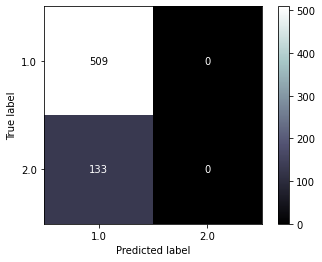

In [39]:
y_hat_test_log = gs_log.predict(X_test_log)

cnf_matrix_log = confusion_matrix(y_test_log, y_hat_test_log)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_log,
                              display_labels=gs_log.classes_)
disp.plot(cmap=plt.cm.bone)

Oh my, *it was* just guessing blindly. Is there anything that can be done to make it smarter?

#### Second logistic regression attempt
Applying a class weight hyperparameter is the first thing that comes to mind. I'll also try out some new, high C values to see if a larger penalty makes a difference.

In [199]:
# Retrying a grid search, also with new solvers previously unavailable
param_grid = {
    'fit_intercept': [True],
    "penalty": ["l2"],
    'C': [50, 25, 16, 10],
    'solver': ["sag"],
    "random_state": [27],
    "class_weight": ['balanced', "balanced_subsample"]
}

best_score = 0
best_params = []
best_pairs = []

#Still trying to see which correlated columns should be dropped
for p in products:
    X_train, X_test, y_train, y_test = train_test_split(num_wave, 
                                                        y, random_state=27)
    drop_cols = ["Q87 Confidence: The World Bank (WB)"]
    for item in p:
        drop_cols.append(item)
    X_train.drop(drop_cols, axis = 1)
    gs = GridSearchCV(logreg, param_grid, cv=5)
    gs.fit(X_train, y_train)
    if gs.score(X_train, y_train) > best_score:
        best_score = gs.score(X_train, y_train)
        best_params = gs.best_params_
    else:
        pass
    
print("best score = ", best_score)
print("best params = ", best_params)
print("dropped columns = ", drop_cols)

best score =  0.7893915756630265
best params =  {'C': 50, 'class_weight': 'balanced_subsample', 'fit_intercept': True, 'penalty': 'l2', 'random_state': 27, 'solver': 'sag'}
dropped columns =  ['Q87 Confidence: The World Bank (WB)', 'Q29 Men make better political leaders than women do', 'Q222 Vote in elections: national level', 'Q79 Confidence: The Environmental Protection Movement']


Note: The dropped columns here were actually the same ones from the previous attempt.

The best score once again looks like it's just guessing blindly. Let's confirm.

In [200]:
logreg_bal = LogisticRegression(C= 0.50, class_weight = "balanced_subsample",
                            fit_intercept = True, penalty = 'l2', 
                            random_state = 27, solver = 'sag')

logreg_bal.fit(X_train_log, y_train_log)
print(logreg_bal.score(X_test_log, y_test_log))

0.7928348909657321


#### The second logreg model isn't any smarter.

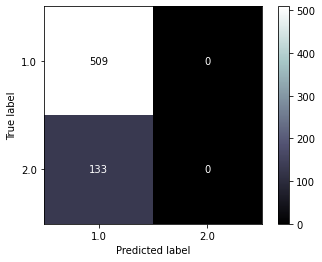

In [201]:
y_hat_test_bal = logreg_bal.predict(X_test_log)

cnf_matrix_bal = confusion_matrix(y_test_log, y_hat_test_l1)

disp_bal = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_bal,
                              display_labels=logreg_l1.classes_)
disp_bal.plot(cmap=plt.cm.bone)

#### It seems as though I can't reliably predict someone's religiosity based on unrelated factors. However, we still have a few extra models to try before we give up.

### Addendum
I have questions about why this model performed as it did. Earlier, I accidentally left a highly relevant column in my dataframe and didn't catch it until what would have been the final leg of my project. "Question 94: Are you a part of a religious organization". Before I removed that one question, the logreg models made smarter predictions. Now that the strongest column has been removed... it seems like it doesn't know what to do. Very curious.

# Bonus Model: GradientBoostingClassifier



While doing research on how best to approach my problem I ran into this model type.

From what I'm able to understand, it's an ensemble method, like the random forest. But instead of making random subsets of the dataframe and averaging the results, it progressively makes incremental improvements on previous iterations of itself. Evidently, it's sensitive to differences in the hyperparameters but with proper tuning it *should* do better than the random forest. So... let's see what I get?

First, I need to finally create the generic train and test subsets.

In [150]:
X_train, X_test, y_train, y_test = train_test_split(num_wave, 
                                                    y, random_state=27)

Then, let me see if I can reduce my processing time by seeing where increasing the number of estimators stops tending to increase accuracy.

In [110]:
scores_1 = []
for i in range(1, 100):
    gbc = GradientBoostingClassifier(n_estimators=i)
    gbc.fit(X_train, y_train)
    preds = gbc.predict(X_test)
    scores_1.append(accuracy_score(y_test, preds))

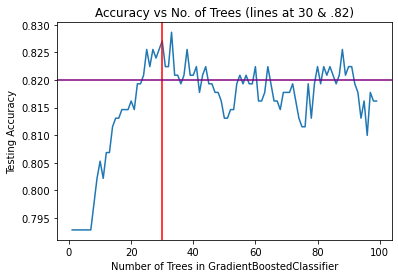

In [214]:
plt.plot(range(1, 100), scores_1)
plt.xlabel('Number of Trees in GradientBoostedClassifier')
plt.ylabel('Testing Accuracy')
plt.title("Accuracy vs No. of Trees (lines at 30 & .82)")
plt.axvline(30, color = "red")
plt.axhline(.82, color = "purple")

That looks like we're getting to the ceiling by about 30.

In [139]:
scores_2 = []
for i in range(1, 100):
    gbc = GradientBoostingClassifier(learning_rate=(i/20), n_estimators=30)
    gbc.fit(X_train, y_train)
    preds = gbc.predict(X_test)
    scores_2.append(accuracy_score(y_test, preds))

''

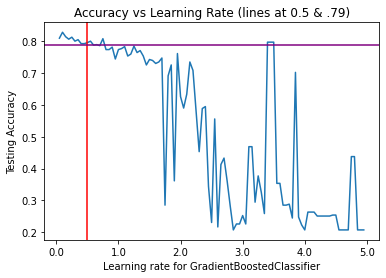

In [210]:
fig, ax = plt.subplots()
plt.plot(range(1, 100), scores_2)
plt.xlabel('Learning rate for GradientBoostedClassifier')
plt.ylabel('Testing Accuracy')
plt.title("Accuracy vs Learning Rate (lines at 0.5 & .79)")
plt.axvline(10, color = "red")
plt.axhline(.79, color = "purple")
multiples = range(0, 120, 20)
ax.set_xticks(multiples)
ax.set_xticklabels([i/20 for i in multiples])
;

Woah, that's a funny chart. I hope I can one day understand why it has such... noteworthy behavior in those midranges. But for now, I'll stick to values far below 1.

#### First GradientBoostedClassifier model

In [153]:
# There are a lot of parameters to choose from, so I will keep the number
# of choices per parameter low for now.
param_grid = {
    "loss": ["log_loss", "exponential"],
    "learning_rate": [.1],
    'n_estimators': [30],
    'subsample': [0.55, .7, .85, 1],
    "min_samples_split": [6, 9, 12], # I chose 6 as the smallest one here...
    "min_samples_leaf": [1, 3], # ... so I can choose a bigger "big" leaf
    "max_depth": [3, 4, 5, None], 
    # I know this will raise runtime but it's
    # the only param that the doc highlights
    # as being especially important. So I'll try 4
    "random_state": [27]
}

gbc = GradientBoostingClassifier()

gs_gbc = GridSearchCV(gbc, param_grid, cv=5)

gs_gbc.fit(X_train, y_train)
print(gs_gbc.best_params_)
print(gs_gbc.score(X_train, y_train))

{'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 30, 'random_state': 27, 'subsample': 0.55}
0.8647945917836714


86.5% on the training set means that it's only recovering 7 of the 21 percent between guessing blindly like my logreg models did and an omniscient one. To my mildly-trained-eye this is underfitting.

Documentation for the GBC states: "Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias"

This means that the smaller the subsample the more it underfits. This model landed on the smallest subset value in the grid.

In [158]:
gs_gbc.score(X_test, y_test)

0.8271028037383178

In [159]:
classification_report(y_test, gs_gbc.predict(X_test), output_dict=True)

{'1.0': {'precision': 0.8327759197324415,
  'recall': 0.9783889980353635,
  'f1-score': 0.8997289972899729,
  'support': 509},
 '2.0': {'precision': 0.75,
  'recall': 0.24812030075187969,
  'f1-score': 0.37288135593220334,
  'support': 133},
 'accuracy': 0.8271028037383178,
 'macro avg': {'precision': 0.7913879598662208,
  'recall': 0.6132546493936216,
  'f1-score': 0.6363051766110881,
  'support': 642},
 'weighted avg': {'precision': 0.8156276372956586,
  'recall': 0.8271028037383178,
  'f1-score': 0.7905845482236437,
  'support': 642}}

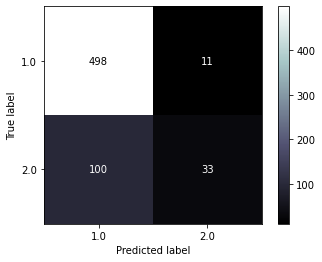

In [160]:
y_hat_test_gbc = gs_gbc.predict(X_test)

cnf_matrix_gbc = confusion_matrix(y_test, y_hat_test_gbc)

disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_gbc,
                              display_labels=gs_gbc.classes_)
disp_gbc.plot(cmap=plt.cm.bone)

Nearly 98% recall for the majority class sounds pretty absurd. But there are too many issues with the other scores for me to be happy. A 0.37 f1 score for the minority class is really rough. Also the overall accuracy is not impressive.

So I still suspect that the model is underfitting. To get it to fit a bit more tightly, I want to raise the variance.

#### Second GradientBoostedClassifier: Overfitting attempt

In [170]:
param_grid = {
    "loss": ["log_loss", "exponential"],
    "criterion": ["friedman_mse", "squared_error"],
    #Added "criterion" to the GS since I had room for more params this time
    "learning_rate": [.1],
    'n_estimators': [30],
    'subsample': [1],
    "max_features": [None],
    "min_samples_split": [2], 
    "min_samples_leaf": [1],
    "max_depth": [None],
    "random_state": [27]
    #Essentially I'm explicitly telling it to swing all the way to the other
    #end of the spectrum.
}

gs_gbc_overfit = GridSearchCV(gbc, param_grid, cv=5)
    
gs_gbc_overfit.fit(X_train, y_train)
print(gs_gbc_overfit.best_params_)
print(gs_gbc_overfit.score(X_train, y_train))

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30, 'random_state': 27, 'subsample': 1}
1.0


In [168]:
gs_gbc_overfit.score(X_test, y_test)
classification_report(y_test, gs_gbc_overfit.predict(X_test), output_dict=True)

{'1.0': {'precision': 0.8408644400785854,
  'recall': 0.8408644400785854,
  'f1-score': 0.8408644400785854,
  'support': 509},
 '2.0': {'precision': 0.39097744360902253,
  'recall': 0.39097744360902253,
  'f1-score': 0.39097744360902253,
  'support': 133},
 'accuracy': 0.7476635514018691,
 'macro avg': {'precision': 0.615920941843804,
  'recall': 0.615920941843804,
  'f1-score': 0.615920941843804,
  'support': 642},
 'weighted avg': {'precision': 0.7476635514018691,
  'recall': 0.7476635514018691,
  'f1-score': 0.7476635514018691,
  'support': 642}}

Well, I definitely created the monster I was hoping for. This was a profoundly overfitting model.

So let's search for a sweetspot. Generally speaking, I'm choosing values that are around the geometric mean of the two previous models' hyperparameters. I intuitively believe that the geometric mean is more useful than the arithmetic mean since most relationships between numbers are proportional/multiplicative.

I ran into a snag in this process, however: I can't figure out what the maximum depth the previous classifier actually reached! So I am going to make a best guess by using a generic decision tree classifier which comes equipped with an easy to access max_depth figure.

In [190]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print(clf.tree_.max_depth)

14


So I'll use 14 as my stand in for the calculation. The geometric mean of 14 and 4 is about 7.5

#### Third GradientBoostedClassifier attempt: A middleground?

In [197]:
param_grid = {
    "loss": ["exponential"], #exponential won each time before
    "learning_rate": [.1],
    'n_estimators': [30],
    'subsample': [.75, .85],
    "max_features": [55],
    "min_samples_split": [4,5], 
    "min_samples_leaf": [2],
    "max_depth": [6, 8],
    "random_state": [27]
}

gs_gbc_mid = GridSearchCV(gbc, param_grid, cv=5)
    
gs_gbc_mid.fit(X_train, y_train)
print(gs_gbc_mid.best_params_)
print(gs_gbc_mid.score(X_train, y_train))

{'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 6, 'max_features': 55, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 30, 'random_state': 27, 'subsample': 0.85}
0.9490379615184608


94.9% accuracy on the training set is *exactly* what I was hoping for. And the verdict on test data is...

In [196]:
print(gs_gbc_mid.score(X_test, y_test))
classification_report(y_test, gs_gbc_mid.predict(X_test), output_dict=True)

0.8161993769470405


{'1.0': {'precision': 0.8252911813643927,
  'recall': 0.9744597249508841,
  'f1-score': 0.8936936936936938,
  'support': 509},
 '2.0': {'precision': 0.6829268292682927,
  'recall': 0.21052631578947367,
  'f1-score': 0.3218390804597701,
  'support': 133},
 'accuracy': 0.8161993769470405,
 'macro avg': {'precision': 0.7541090053163427,
  'recall': 0.5924930203701788,
  'f1-score': 0.6077663870767319,
  'support': 642},
 'weighted avg': {'precision': 0.7957982548398113,
  'recall': 0.8161993769470405,
  'f1-score': 0.7752253703913389,
  'support': 642}}

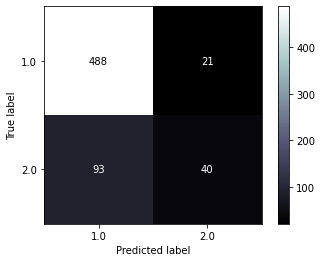

In [57]:
y_hat_test_gbc = gs_gbc_2.predict(X_test)

cnf_matrix_gbc = confusion_matrix(y_test, y_hat_test_gbc)

disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_gbc,
                              display_labels=gs_gbc.classes_)
disp_gbc.plot(cmap=plt.cm.bone)

...not good. This model actually performed worse than the first model (which I accused of underfitting). Its scores on the majority class were fair but it fell short classifying the minority class. Its f1 score for atheists was even smaller than that of the overfitter. 

It seems as though, for now, the initial GBC model is the benchmark to beat.

### Current high scores:
#### Accuracy of  82.7%, minority class f1 of .37, and weighted f1 score of .791.

# Complex Model: Random Forest

As suggested in the prompt for this project, the last model will be a Random Forest. 

Learning from my experience with the GBC model, I will preemptively try three models: one with hyperparameters that promote overfitting, one that promotes underfitting, and something with more of a middle ground.

The random forest has a *lot* of possible knobs to turn, and in my naive state as a new data scientist I cannot quite tell which ones are most important. But at the very least I know I've seen how to approximate how many trees I should make.

In [215]:
#Assessing test scores for simple random forests with varying amounts of trees
scores = []
for i in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, preds))

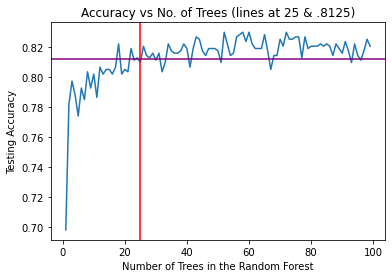

In [219]:
plt.plot(range(1, 100), scores)
plt.xlabel('Number of Trees in the Random Forest')
plt.ylabel('Testing Accuracy')
plt.title("Accuracy vs No. of Trees (lines at 25 & .8125)")
plt.axvline(25, color = "red")
plt.axhline(.8125, color = "purple")

To my surprise, we only need a couple dozen trees to reach an asymptote of test accuracy.

In [220]:
#First: the Overfitter
forest = RandomForestClassifier()

param_grid = {
    "criterion": ["gini", "entropy"],
    'n_estimators': [25],
    "max_features": [None], # no max = high variance = overfitting
    "min_samples_leaf": [1], # no minimum leaf size means more granularity
    "max_depth": [None], # max depth = max purity
    "class_weight": ["balanced", None],
    "oob_score": [True, False],
    "random_state": [27]
}

gs_forest_over = GridSearchCV(forest, param_grid, cv=5)
gs_forest_over.fit(X_train, y_train)

print(gs_forest_over.best_params_)
print("score = ", gs_forest_over.score(X_train, y_train))

{'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 25, 'oob_score': True, 'random_state': 27}
score =  0.9984399375975039


A nearly perfectly fit training model, which is essentially what I was hoping for to try my experiment.

In order to calibrate the "medium fit" forest, I'm just going to double check how many columns there are...

In [225]:
# Double checking how many possible estimators there could be
len(X_train.columns)

221

...and see how deep those trees just grew.

In [221]:
#The actual used depth for the trees was well-hidden information

# the following code was repurposed from
#https://datascience.stackexchange.com/questions/19842/
# anyway-to-know-all-details-of-trees-grown-using-randomforestclassifier-in-
# scikit/36228#36228

over_forest = RandomForestClassifier(criterion="gini", n_estimators = 220, 
                                    oob_score= True, random_state= 27)
over_forest.fit(X_train, y_train)
print("Median max depth: ", np.median([t.get_depth() 
                                       for t in over_forest.estimators_]))
print("Maximim max depth: ", max([t.get_depth() 
                                  for t in over_forest.estimators_]))

Median max depth:  16.0
Maximim max depth:  21


In [222]:
#Second: the Mid-fitter
param_grid = {
    "criterion": ["gini", "entropy"],
    'n_estimators': [25],
    "max_features": [110], #half of the features in the set
    "min_samples_leaf": [3], # a step above 1
    "max_depth": [8, 10], # around half the previous max
    "class_weight": ["balanced", None],
    "oob_score": [True, False],
    "random_state": [27]
}

gs_forest_mid = GridSearchCV(forest, param_grid, cv=5)
    
gs_forest_mid.fit(X_train, y_train)
print(gs_forest_mid.best_params_)
print(gs_forest_mid.score(X_train, y_train))

{'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 110, 'min_samples_leaf': 3, 'n_estimators': 25, 'oob_score': True, 'random_state': 27}
0.9339573582943318


93% training accuracy is about what I expected.Far enough away from the 99.8% in the previous model that I feel good about its niche in the experiment.

In [226]:
#Lastly: the under-fitter

param_grid = {
    "criterion": ["gini", "entropy"],
    'n_estimators': [25],
    "max_features": ["sqrt"],
    "min_samples_leaf": [5], # a step above 3
    "max_depth": [5, 6], # halving the prev max depths may be too dramatic
    "class_weight": ["balanced", None],
    "oob_score": [True, False],
    "random_state": [27]
}

gs_forest_under = GridSearchCV(forest, param_grid, cv=5)
    
gs_forest_under.fit(X_train, y_train)
print(gs_forest_under.best_params_)
print(gs_forest_under.score(X_train, y_train))

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 25, 'oob_score': True, 'random_state': 27}
0.8387935517420697


Something interesting to note: When given the choice, no model has yet chosen to apply weight to the classes. I wonder if this means that a class ratio of 5:1 is not considered unbalanced enough for the "weights" feature to be very useful?

### The scores for the forests

In [227]:
print("overfit accuracy scores=", gs_forest_over.score(X_test, y_test))
print("midfit accuracy scores=", gs_forest_mid.score(X_test, y_test))
print("underfit accuracy scores=", gs_forest_under.score(X_test, y_test))

overfit accuracy scores= 0.8193146417445483
midfit accuracy scores= 0.8208722741433022
underfit accuracy scores= 0.8115264797507789


My somewhat arbitrarily chosen middle-ground just barely edges out the "overfitter". But I am especially interested in the recall scores for each model regarding the minority case:

In [99]:
#Overfitter scores
classification_report(y_test, gs_forest_over.predict(X_test), output_dict=True)

{'1.0': {'precision': 0.8417391304347827,
  'recall': 0.9508840864440079,
  'f1-score': 0.8929889298892989,
  'support': 509},
 '2.0': {'precision': 0.6268656716417911,
  'recall': 0.3157894736842105,
  'f1-score': 0.42,
  'support': 133},
 'accuracy': 0.8193146417445483,
 'macro avg': {'precision': 0.7343024010382868,
  'recall': 0.6333367800641092,
  'f1-score': 0.6564944649446495,
  'support': 642},
 'weighted avg': {'precision': 0.7972248469153623,
  'recall': 0.8193146417445483,
  'f1-score': 0.7950021266567806,
  'support': 642}}

In [100]:
#Midfitter scores
classification_report(y_test, gs_forest_mid.predict(X_test), output_dict=True)

{'1.0': {'precision': 0.8283333333333334,
  'recall': 0.9764243614931237,
  'f1-score': 0.8963029756537421,
  'support': 509},
 '2.0': {'precision': 0.7142857142857143,
  'recall': 0.22556390977443608,
  'f1-score': 0.3428571428571428,
  'support': 133},
 'accuracy': 0.8208722741433022,
 'macro avg': {'precision': 0.7713095238095238,
  'recall': 0.6009941356337799,
  'f1-score': 0.6195800592554425,
  'support': 642},
 'weighted avg': {'precision': 0.8047066458982347,
  'recall': 0.8208722741433022,
  'f1-score': 0.7816483093578734,
  'support': 642}}

In [101]:
#Underfitter scores
classification_report(y_test, gs_forest_under.predict(X_test), output_dict=True)

{'1.0': {'precision': 0.8099041533546326,
  'recall': 0.9960707269155207,
  'f1-score': 0.8933920704845817,
  'support': 509},
 '2.0': {'precision': 0.875,
  'recall': 0.10526315789473684,
  'f1-score': 0.1879194630872483,
  'support': 133},
 'accuracy': 0.8115264797507789,
 'macro avg': {'precision': 0.8424520766773163,
  'recall': 0.5506669424051287,
  'f1-score': 0.540655766785915,
  'support': 642},
 'weighted avg': {'precision': 0.823389741522598,
  'recall': 0.8115264797507789,
  'f1-score': 0.7472427608524239,
  'support': 642}}

I've had to run this test a couple of times, and each time the best option for recall of the minority case was either the "overfitter" or middle of the road option. It's been fairly sensitive to small perturbations in hyperparameters, so let's see if I can zero in on what's causing it to be this way.

#### The "overfit" model overall has the best scores, with 81.9% accuracy, a high f1 score for atheists of .42, and a relatively high weighted f1 score of .795.

This is all very comparable to the best gradient boosted classifier scores as well. I will barely give the edge to the random forest, however, because it is marginally better at identifying atheists.

#  Final model

Let me see if I can maximize the scores for the atheists. Using the middle and overfit models above as a template, let me slightly adjust the parameters a bit around what I had previously arbitrarily landed on.

In [256]:
param_grid = {
    "criterion": ["entropy"], 
    'n_estimators': [25],
    "max_features": [155, 170, 185],
    "min_samples_leaf": [1, 2], 
    # I read that some people have min leaves with 50 or more. Surprised me
    "max_depth": [7, 8, 9],
    "class_weight": ["balanced", None],
    "oob_score": [True],
    "random_state": [27]
}

gs_forest_final_1 = GridSearchCV(forest, param_grid, cv=5)

gs_forest_final_1.fit(X_train, y_train)
print(gs_forest_final_1.best_params_)
print(gs_forest_final_1.score(X_train, y_train))

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 185, 'min_samples_leaf': 1, 'n_estimators': 25, 'oob_score': True, 'random_state': 27}
0.9641185647425897


In [257]:
print(gs_forest_final_1.score(X_test, y_test))
classification_report(y_test, gs_forest_final_1.predict(X_test), output_dict=True)

0.8006230529595015


{'1.0': {'precision': 0.8614800759013282,
  'recall': 0.8919449901768173,
  'f1-score': 0.8764478764478764,
  'support': 509},
 '2.0': {'precision': 0.5217391304347826,
  'recall': 0.45112781954887216,
  'f1-score': 0.48387096774193544,
  'support': 133},
 'accuracy': 0.8006230529595015,
 'macro avg': {'precision': 0.6916096031680554,
  'recall': 0.6715364048628447,
  'f1-score': 0.6801594220949059,
  'support': 642},
 'weighted avg': {'precision': 0.7910976058903461,
  'recall': 0.8006230529595015,
  'f1-score': 0.7951196383514744,
  'support': 642}}

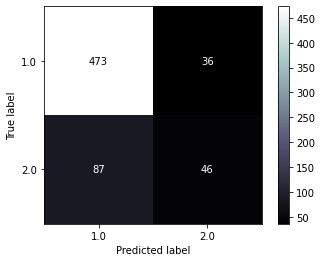

In [258]:
y_hat_test = gs_forest_final.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_hat_test)

disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=gs_forest_final.classes_)
disp_gbc.plot(cmap=plt.cm.bone)

Hey, would you look at that. I managed to bring the precision and recall for the 2.0 answers close together, resulting in a relatively robust harmonic mean (f1) of .483 for the minority case! But, oddly enough, my overall accuracy is down to about 80%.

#### Do I think this model is my best one? Yes.
Why? Over the course of the project, I noticed that there weren't models that could find atheists with any consistency. This was also true with all of the redo models I had to make during the surprisingly large amount of time that I spent on this project.

On earlier iterations, I did find a random forest that was able to reach a recall score for atheists nearing 55%, but that was back when I had a strong religion-associated column still in the pool.

I have at least one hypothesis for why the atheists were so difficult to track down: while some religious people tend to coalesce around certain positive/negative stereotypes, plenty of them do not. Those religious people who don't conform to those stereotypes are possibly mostly indistinguishable from atheists, since as a collective both of these groups could make up a hyperdiverse population with few features that bind any of them together.

Being able to make a guess for atheists that are over 50% accurate is ultimately satisfying. I could easily imagine a business that wants to send out a newsletter or targeted advertising to this minority group, and I would feel happy to recommend my model. Rather than send out ads blindly to 100% of the population in order to reach 20% of it, my model would allow the business to send smarter ads to 20% of the population in order to reach about 10% of it. Much more efficient.

One last thing: Let's see what questions were the most important for my model!

In [263]:
#The following series of cells code were altered from an answer found on
#inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html
final_model = RandomForestClassifier(criterion = 'entropy', max_depth = 9,
                              max_features = 185, min_samples_leaf = 1, 
                              n_estimators = 25, class_weight = "balanced",
                              oob_score = True, random_state = 27)

In [264]:
final_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_features=185, n_estimators=25,
                       oob_score=True, random_state=27)

In [265]:
final_model.score(X_test, y_test)

0.8006230529595015

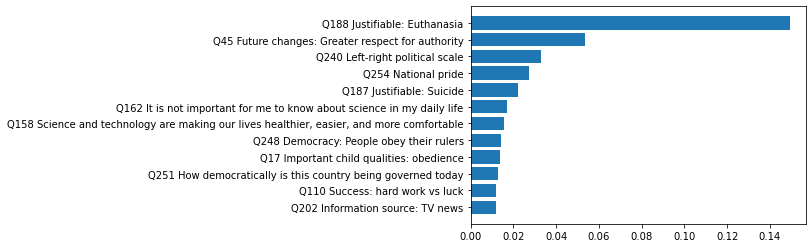

In [269]:
importances = final_model.feature_importances_
indices = np.argsort(importances)

top_12 = indices[-12:]

fig, ax = plt.subplots()
ax.barh(range(12), importances[top_12])
ax.set_yticks(range(12))
_ = ax.set_yticklabels(np.array(X_train.columns)[top_12])

I would have assumed that the left-right political scale would be the most predictive question, but euthanasia makes sense in retrospect.

The second highest predictor, Q45 is really asking whether or not it would be a good thing for society if there was a greater respect for authority. I know I had heard of this as a stereotype for right-wingers in America, I am surprised that this predicts religiosity more than the label of right-wing in the first place.

All of these answers are fascinating, and it's satisfying to see my work (while not conclusive) bear fruit that passes the eye test.

# Weird note that I just had to say:

P.S.
There is a question in the survey that I can't help but mention. I've been telling all of my friends about it, so if you can, please excuse my lapse into casual commentary.

For this question, only 55.2% of people gave a rating of 10 out of 10. 

What was the question?

"On a scale of 1 to 10, how essential a characteristic of democracy is it that people choose their leaders in free elections".

This means that almost half of all americans surveyed picked a number that was NOT a 10.

Oh.. man...
Anyway, thank you for making it to the end of my project. I really enjoyed this one.